# IRIS Flower Dataset: Linear Regression

In [ ]:
import numpy as np
import pandas as pd

# load the dataset
df = pd.read_csv('IrisFlowerDataset.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = df.drop(columns=['petal_length', 'petal_width'])
df

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [ ]:
#df['species'] = df['species'].replace({'Iris-setosa': 1.0, 'Iris-versicolor': 2.0, 'Iris-virginica': 3.0})
df

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(df)

,sepal_length,sepal_width,species
0,5.1,3.5,1.0
1,4.9,3.0,1.0
2,4.7,3.2,1.0
3,4.6,3.1,1.0
4,5.0,3.6,1.0
...,...,...,...
145,6.7,3.0,3.0
146,6.3,2.5,3.0
147,6.5,3.0,3.0
148,6.2,3.4,3.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

print("Shapes: ", X.shape, X_train.shape, X_test.shape)

model = LinearRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Model parameters: ", model.coef_, model.intercept_)

Shapes:  (150, 2) (120, 2) (30, 2)
Model parameters:  [ 0.72039588 -0.66538649] -0.15881389461756656


In [ ]:
print(preds)

preds = preds.round()

print(preds)

preds[preds < 1.0] = 1.0
preds[preds > 3.0] = 3.0

print(preds)

print(np.array(y_test))

accuracy = np.sum(np.array(y_test) == preds) / len(preds)
print(accuracy)

[2.37251882 1.41897398 3.65822954 2.23394059 2.87679594 1.46900981
 1.94578223 2.74921958 2.84379031 2.22293871 2.39452258 1.30292688
 1.47451075 1.30842782 0.98673645 2.18390476 2.52759988 2.21193683
 2.08436047 2.58863759 1.09780999 2.23944153 1.18085146 2.58863759
 3.00384493 2.67167906 3.0043723  2.61064135 1.30292688 1.23638823]
[2. 1. 4. 2. 3. 1. 2. 3. 3. 2. 2. 1. 1. 1. 1. 2. 3. 2. 2. 3. 1. 2. 1. 3.
 3. 3. 3. 3. 1. 1.]
[2. 1. 3. 2. 3. 1. 2. 3. 3. 2. 2. 1. 1. 1. 1. 2. 3. 2. 2. 3. 1. 2. 1. 3.
 3. 3. 3. 3. 1. 1.]
[2. 1. 3. 2. 2. 1. 2. 3. 2. 2. 3. 1. 1. 1. 1. 2. 3. 2. 2. 3. 1. 3. 1. 3.
 3. 3. 3. 3. 1. 1.]
0.8666666666666667


# Insurance Dataset

# Dataset

In [ ]:
# load the dataset
df = pd.read_csv('InsuranceDataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age, bmi, children and charges are numbers wherese sex, smoker and region are strings

Let's look at the statistics of the data

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Data Analysis

In [ ]:
import plotly
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For beautification purposes
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year)

In [ ]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### BMI

In [ ]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker

In [ ]:
px.histogram(df, x='smoker', title='Smoker')

### Smoking and Charges

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
{'no': 8434.268297856202, 'yes': 32050.23183153285}


<BarContainer object of 2 artists>

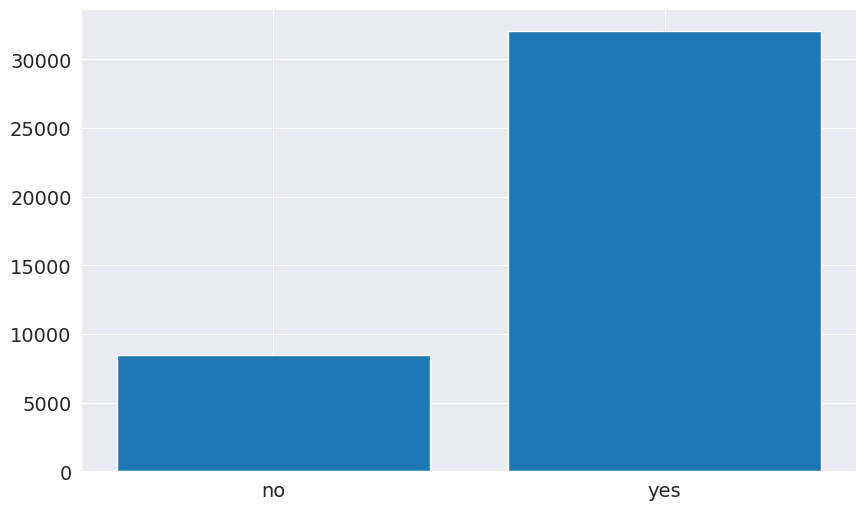

In [ ]:
df_mean_val = df.groupby('smoker')['charges'].mean()
print(df_mean_val)

df_mean_val = df_mean_val.to_dict()
print(df_mean_val)

names, counts = zip(*df_mean_val.items())
plt.bar(names, counts)

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [ ]:
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [ ]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Convert categorical variables to numerical

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Binary variables

In [ ]:
# smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
smoker_codes = {'yes':1, 'no':0}
df['smoker'] = df['smoker'].map(smoker_codes)

In [ ]:
df['smoker'].unique()

array([1, 0])

In [ ]:
# sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
sex_codes = {'female':0, 'male':1}
df['sex'] = df['sex'].map(sex_codes)

In [ ]:
df['sex'].unique()

array([0, 1])

### Non-binary variables - One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()

In [ ]:
# region
enc.fit(df[['region']])

OneHotEncoder()

In [ ]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
region_one_hot = enc.transform(df[['region']])

In [ ]:
region_one_hot

<1338x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [ ]:
region_one_hot.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = region_one_hot.toarray()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
df.drop(columns=['region'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   float64
 7   northwest  1338 non-null   float64
 8   southeast  1338 non-null   float64
 9   southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


## Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

[source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">


Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

<img src="https://mail.google.com/mail/u/0?ui=2&ik=c5346f11cf&attid=0.1&permmsgid=msg-f:1788405689496200580&th=18d1b17fccb56584&view=att&disp=safe" width="720">

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


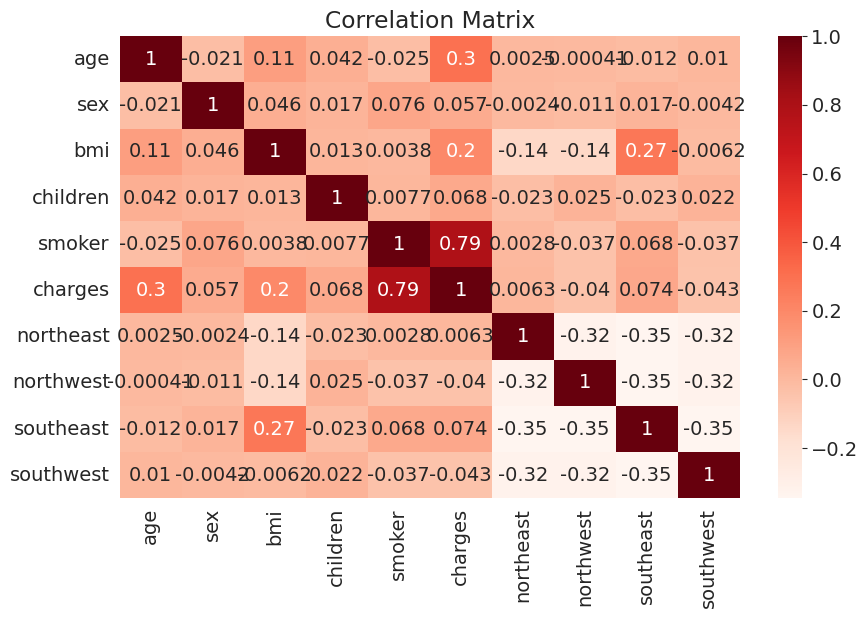

In [ ]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## Split the dataset into train and validation

In [ ]:
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
X.shape, X_train.shape, X_test.shape

((1338, 9), (1070, 9), (268, 9))

# Linear Regression

In [ ]:
model = LinearRegression(fit_intercept=True)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
rmse(y_test, preds)

5796.2846592762735

In [ ]:
model.coef_, model.intercept_

(array([ 2.56975706e+02, -1.85916916e+01,  3.37092552e+02,  4.25278784e+02,
         2.36511289e+04,  4.59585244e+02,  8.89079180e+01, -1.98279052e+02,
        -3.50214110e+02]),
 -12390.804294570278)

In [ ]:
model.coef_ = np.random.normal(loc=0.0, scale=1.0, size=(9))
model.intercept_ = np.random.normal(loc=0.0, scale=1.0, size=None)
model.coef_, model.intercept_

(array([ 0.3947637 ,  0.51506091,  0.30120883, -0.30928482, -1.26548847,
        -0.01649338, -1.31272332,  0.12268605, -0.13911523]),
 -0.42973583466000587)

In [ ]:
preds_random = model.predict(X_test)
print(rmse(y_test, preds_random))

17965.702172063222


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,0.394764
1,sex,0.515061
2,bmi,0.301209
3,children,-0.309285
4,smoker,-1.265488
5,northeast,-0.016493
6,northwest,-1.312723
7,southeast,0.122686
8,southwest,-0.139115
9,1,-0.429736


## Feature Scaling

It's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
numeric_cols = ['age', 'bmi', 'children']

In [ ]:
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.35700935, 30.5603972 ,  1.10747664])

In [ ]:
scaler.var_

array([197.89123592,  36.4883772 ,   1.47723382])

In [ ]:
scaled_inputs = scaler.transform(X_train[numeric_cols])
scaled_inputs

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

In [ ]:
scaled_test = scaler.transform(X_test[numeric_cols])

In [ ]:
X_train[numeric_cols] = scaled_inputs
X_test[numeric_cols] = scaled_test

In [ ]:
model_scaled = LinearRegression()

In [ ]:
model_scaled.fit(X_train, y_train)

LinearRegression()

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
4,smoker,23651.128856
9,1,8495.659557
0,age,3614.975415
2,bmi,2036.228123
3,children,516.890247
5,northeast,459.585244
6,northwest,88.907918
1,sex,-18.591692
7,southeast,-198.279052
8,southwest,-350.214110


# Task

2. Check the correlation of all the four input features with all the four input features for IRIS Flower Dataset.
1. Do feature scaling for IRIS Flower Dataset taking only the first two features.
3. Train a Regression Model (80% data for training) using all the four input features (with scaling) and then predict. Then change the model parameters (coefficients and intercept) to random values and predict. Compare the predictions in both cases.